# Data Structures and Processing

## Week3: NumPy, and Matplotlib

In [1]:
import numpy as np
from typing import Union

### Task 1: Custom NumPy Functions

Write down a function `heaviside` which takes a number (`int` or `float`) and returns 1 if it is positive, 0 otherwise.

In [4]:
from typing import Union

def heaviside(num: Union[int, float]) -> int:
    # your code here
    if num>0:
        return 1
        
    else:
        return 0
    
    

In [5]:
assert heaviside(0.1) == 1
assert heaviside(-0.1) == 0
assert heaviside(0) == 0
assert heaviside(4) == 1

At this point, your function `heaviside` will return a `ValueError` if a NumPy array is provided as an input to it.  We would like to extend this function so that it handles any `ndarray` whose dtype is `int` or `float`.

Extend the `heaviside` function to handle the `ndarray`.

In [6]:
# Your solution to extend the heaviside function to handle `ndarray` goes here.
from typing import Union

def heaviside(num: Union[int, float, np.ndarray])->Union[int,np.ndarray]:
    # your code here
        # Use np.array to ensure the operation works for both scalars and arrays
    num_array = np.array(num)
    
    # Element-wise comparison to generate the heaviside step values
    result = np.where(num_array > 0, 1, 0)
    
    # If the input was a scalar, return a scalar; otherwise, return an array
    if np.isscalar(num):
        return result.item()
    else:
        return result
'''
    is_list = type(num) == list
    if is_list==True:
        #it's an array
        finalarray=np.array([])
        for i in num:
            if i > 0:
                finalarray=np.append(finalarray,1)
            else:
                finalarray=np.append(finalarray,0)
        return finalarray
    else:
        if num>0:
            return 1

        else:
            return 0
        #it's not an array;
        '''

a = np.array([0,1,2])

heaviside(a)

array([0, 1, 1])

In [7]:
assert np.all(heaviside(np.array([-1.2, 0.2, 3])) == np.array([0, 1, 1]))

### Task 2: Aggregate Functions

There are a lot of aggregate functions available in NumPy. Some of the variable useful ones include: `np.sum`, `np.mean`, `np.std`, `np.max`, `np.min` and so on.  For a detailed explanation of the parameters these function take in, have a look at their documentation using `help`.

Write down a function `mean_squared_values` that takes an `ndarray` as an argument and returns the mean value of the squares of elements in it.

In [10]:
def mean_squared_values(arr: np.ndarray)->int:
    # your code here
    
    sq=np.square(arr)
    
    return np.mean(sq)

In [12]:
import numpy as np
x_utest = np.arange(10)
assert mean_squared_values(x_utest) == 28.5

### Task 3: I/O and Visualization

In this task, we plan to read a data to an `ndarray`, process it, visualize the processed data, and write down to a file.

#### Step 1: Reading Data From a File

Consider the file `data.txt` in the current directory, and read its content to an array named `arr`.

Write down a function `read_values` that takes a `CSV` file `filename` as an input and an `index` as a second argument, and returns the `index` column from the `CSV` file as a NumPy array. You can use either `np.loadtxt` or `pandas.read_csv` here.

In [55]:
import pandas as pd

def read_values(filename: str, index: int):
    # your code here
    df = pd.read_csv(filename, usecols=[index], header=None)
    return df.iloc[:, 0].to_numpy()

read_values("data.txt", 0)

array([-1.9142, -1.8918, -1.3978, -1.382 , -1.2789, -0.9405, -0.9159,
       -0.9139, -0.668 , -0.5575, -0.4231, -0.4084, -0.4001, -0.2533,
       -0.0993,  0.2214,  0.2642,  0.4028,  0.4189,  0.596 ,  0.6265,
        0.8675,  0.8837,  0.9667,  1.04  ,  1.0471,  1.115 ,  1.7697,
        1.814 ])

In [56]:
import numpy as np
first_five = np.array([-1.9142, -1.8918, -1.3978, -1.382, -1.2789])
assert np.allclose(read_values("data.txt", 0)[:5], first_five)

Use your function to read in values to two variables `x_values` and `y_values`.

In [60]:
x_values = read_values("data.txt", 0)
y_values =read_values("data.txt", 1)

In [61]:
first_five_x = np.array([-1.9142, -1.8918, -1.3978, -1.382, -1.2789])
first_five_y = np.array([-0.7919, -0.0492, -1.5441, -0.087, -1.3767])
assert np.allclose(x_values[:5], first_five_x)
assert np.allclose(y_values[:5], first_five_y)

### Step 2: Processing

At this point, we are choosing a simple only to demonstrate the processing before plotting.  The data read in does not reveal something useful because it is randomly generated.

The reader should see that any type of processing is possible at this step.

Let us say that we do not want to change the variable `x_values`, but we do want to process the `y_values` by applying an exponential function `np.exp` from the NumPy library.

In [67]:
y_values = np.exp(read_values("data.txt", 1))

In [68]:
first_five_y = np.array([-0.7919, -0.0492, -1.5441, -0.087, -1.3767])
assert np.allclose(y_values[:5], np.exp(first_five_y))

#### Step 3: Visualization

Take the `x_values` and `y_values` and plot them using `plt.plot`.  Given extra directive of `"bo"` to the plot command.

In [69]:
import matplotlib.pyplot as plt

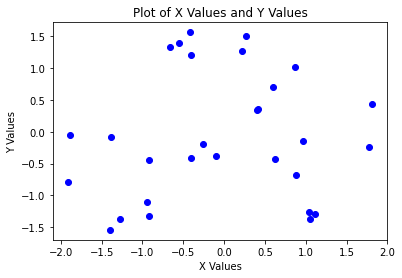

In [72]:
# Your solution to plot goes here
x_values = read_values("data.txt", 0)
y_values =read_values("data.txt", 1)

# Plotting
plt.plot(x_values, y_values, "bo")  # "bo" specifies blue circle markers
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Plot of X Values and Y Values')
plt.show()

#### Step 4: Writing Data to File

Write down a function `data_to_csv` that takes three arguments: `x_values`, `y_values` and `filename`, and writes down the arrays as a CSV file to `filename`.  The delimiter is `","`. You should use either `np.savetxt` of `DataFrame.to_csv` here.

In [90]:
# Your solution to 
def data_to_csv(x_values: np.ndarray, y_values: np.ndarray, filename: str):
    # your code here
    df = pd.DataFrame({'X': x_values, 'Y': y_values})
    
    # Write the DataFrame to a CSV file, using a comma as the delimiter
    df.to_csv(filename, index=False, sep=',')
    

In [91]:
data_to_csv(x_values, y_values, 'new_filename.txt')